In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directories for the training and validation sets
train_dir = 'split_2_Village/train'
val_dir = 'split_2_Village/val'

# Define the image size, batch size, and number of epochs
input_shape = (128, 128, 3)
img_size = (128, 128)
batch_size = 10
num_epochs = 50

# Define the data generators for the training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=True)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=True)

# Define the CNN model with dropout and regularization
model = Sequential()

model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

2023-04-04 12:52:35.428057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 12:52:36.142719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-04 12:52:36.142765: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-04 12:52:36.142771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Found 3500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


2023-04-04 12:52:37.054562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-04 12:52:37.081421: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-04 12:52:37.081829: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-04 12:52:37.082416: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [2]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

In [3]:
# Compile the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [5]:
# Train the model
history = model.fit(train_generator, epochs=num_epochs, validation_data=val_generator, 
                    # callbacks=[tensorboard_callback]
                    )

Epoch 1/50


2023-04-04 12:52:39.195775: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204
2023-04-04 12:52:42.166466: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f237c015630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-04 12:52:42.166492: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-04-04 12:52:42.170000: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-04 12:52:42.255693: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


350/350 [==============================] - 44s 106ms/step - loss: 1.7364 - accuracy: 0.3511 - val_loss: 1.1712 - val_accuracy: 0.5700
Epoch 2/50
350/350 [==============================] - 37s 105ms/step - loss: 1.1905 - accuracy: 0.5526 - val_loss: 0.8953 - val_accuracy: 0.7100
Epoch 3/50
350/350 [==============================] - 37s 106ms/step - loss: 0.9833 - accuracy: 0.6777 - val_loss: 0.6948 - val_accuracy: 0.8100
Epoch 4/50
350/350 [==============================] - 37s 106ms/step - loss: 0.8016 - accuracy: 0.7577 - val_loss: 0.7287 - val_accuracy: 0.7780
Epoch 5/50
350/350 [==============================] - 37s 106ms/step - loss: 0.7304 - accuracy: 0.7789 - val_loss: 0.5367 - val_accuracy: 0.8480
Epoch 6/50
350/350 [==============================] - 37s 106ms/step - loss: 0.6209 - accuracy: 0.8214 - val_loss: 0.5594 - val_accuracy: 0.8240
Epoch 7/50
350/350 [==============================] - 37s 106ms/step - loss: 0.5694 - accuracy: 0.8471 - val_loss: 0.4348 - val_accuracy: 0.8

Text(0.5, 1.0, 'Training and Validation Loss')

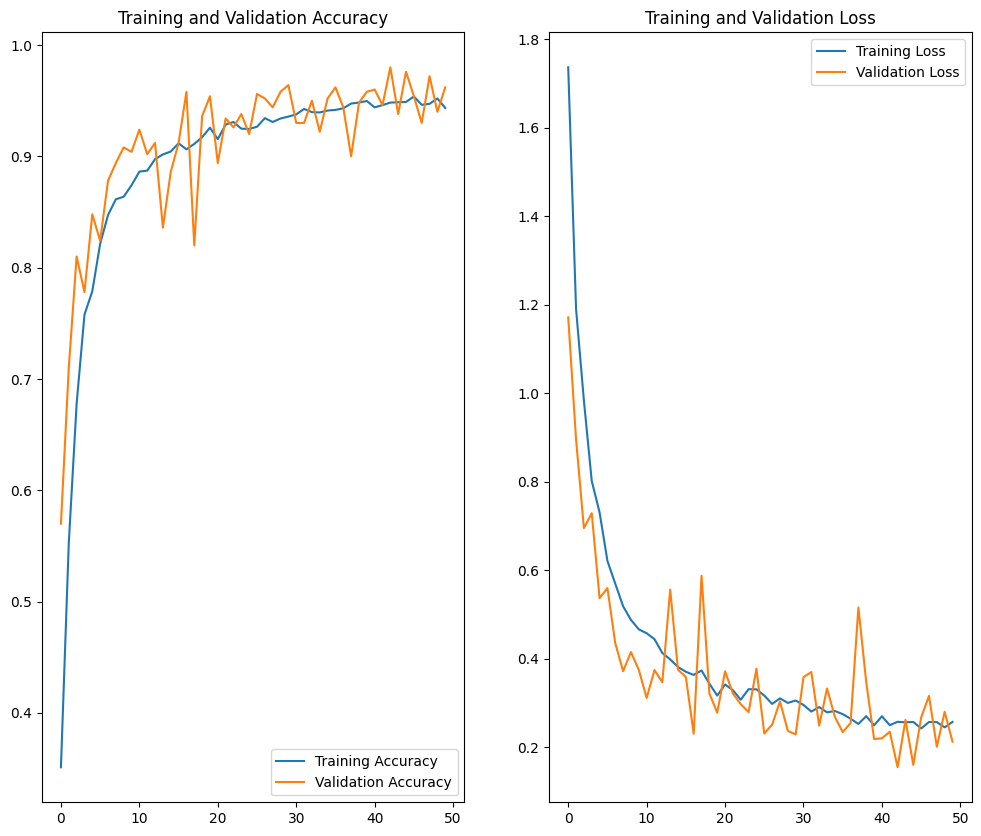

In [6]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.plot(range(num_epochs), acc, label='Training Accuracy')
plt.plot(range(num_epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(122)
plt.plot(range(num_epochs), loss, label='Training Loss')
plt.plot(range(num_epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

Found 1000 images belonging to 5 classes.
100/100 [==============================] - 3s 34ms/step
Test accuracy:19.10


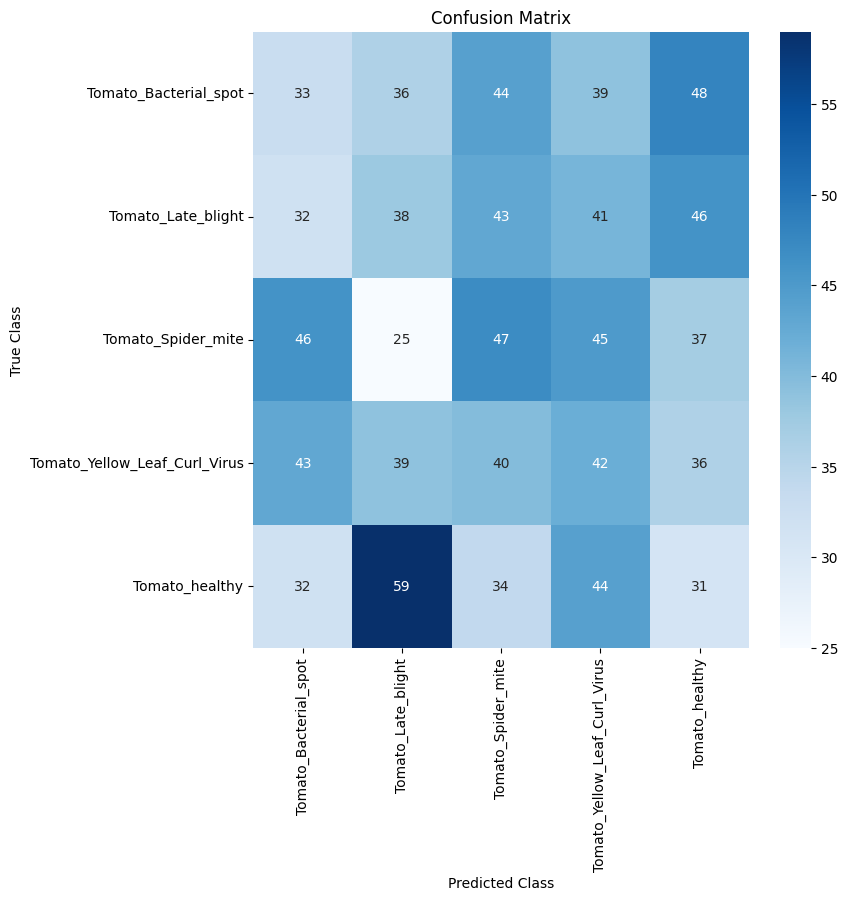

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import os

# Define the directory for the test set
test_dir = 'split_2_Village/test'

# Define the data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=True)

# Use the trained model to make predictions on the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Compute the test accuracy
test_acc = accuracy_score(y_true, np.argmax(y_pred, axis=1)) * 100
print(f'Test accuracy:{test_acc:.2f}')

# Generate the confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Define class names
class_names = sorted(os.listdir(train_dir))

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


In [8]:
from sklearn.metrics import classification_report

# Get the predictions for the test set
y_pred = model.predict(test_generator)

# Get the class labels for the test set
y_true = test_generator.classes

# Get the class names for the test set
class_names = list(test_generator.class_indices.keys())

# Get the classification report
report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_names, digits=4)

# Print the classification report
print(report)

100/100 [==============================] - 3s 34ms/step
                               precision    recall  f1-score   support

        Tomato_Bacterial_spot     0.2312    0.2150    0.2228       200
           Tomato_Late_blight     0.1827    0.1800    0.1814       200
           Tomato_Spider_mite     0.1875    0.1950    0.1912       200
Tomato_Yellow_Leaf_Curl_Virus     0.1848    0.1950    0.1898       200
               Tomato_healthy     0.2071    0.2050    0.2060       200

                     accuracy                         0.1980      1000
                    macro avg     0.1987    0.1980    0.1982      1000
                 weighted avg     0.1987    0.1980    0.1982      1000



In [9]:
# model.save("tomatoes_app.h5")

In [10]:
# # TF-Lite conversion

# # Load the Keras model
# keras_model = tf.keras.models.load_model('tomatoes_app.h5')

# # Convert the Keras model to TFLite format
# converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
# tflite_model = converter.convert()

# # Save the TFLite model to disk
# open("tomatoes_app.tflite", "wb").write(tflite_model)


In [11]:
# import tensorflow as tf
# import numpy as np

# # Load the TFLite model
# interpreter = tf.lite.Interpreter(model_path="tomatoes_app.tflite")
# interpreter.allocate_tensors()

# # Get input and output tensors
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# # Create an image generator
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     directory="split_2_Village/test",
#     target_size=(128, 128),
#     batch_size=10,
#     class_mode='categorical',
#     shuffle=False
# )

# # Evaluate the TFLite model
# total = 0
# correct = 0
# for x_batch, y_batch in test_generator:
#     # Check if reached the end of the generator
#     if total >= test_generator.n // test_generator.batch_size:
#         break
    
#     # Set the input tensor
#     input_data = np.array(x_batch, dtype=np.float32)
#     interpreter.set_tensor(input_details[0]['index'], input_data)
    
#     # Run inference
#     interpreter.invoke()
    
#     # Get the output tensor
#     output_data = interpreter.get_tensor(output_details[0]['index'])
    
#     # Compute the predicted class labels
#     predicted_labels = np.argmax(output_data, axis=1)
    
#     # Compute the number of correctly predicted labels in the batch
#     correct += np.sum(predicted_labels == np.argmax(y_batch, axis=1))
    
#     # Update the total number of samples
#     total += test_generator.batch_size

# # Compute the accuracy
# accuracy = correct / test_generator.n
# print(f"Accuracy: {accuracy}")


In [12]:
# # Load the TFLite model
# interpreter = tf.lite.Interpreter(model_path="tomatoes_app.tflite")
# interpreter.allocate_tensors()

# # Get input and output tensors
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# # Create image generator for validation data
# valid_datagen = ImageDataGenerator(rescale=1./255)

# # Load validation data from directory
# valid_generator = valid_datagen.flow_from_directory(
#     directory="split_2_Village/test",
#     target_size=(128, 128),
#     batch_size=10,
#     class_mode='categorical',
#     shuffle=False
# )

# # Evaluate the model on the validation data
# num_correct = 0
# num_total = 0
# for i in range(len(valid_generator)):
#     # Get batch of validation data
#     x_val, y_val = valid_generator[i]

#     # Add an extra dimension to match the expected shape of the TFLite model
#     x_val = np.expand_dims(x_val, axis=0)

#     # Set the input tensor
#     interpreter.set_tensor(input_details[0]['index'], x_val)

#     # Run inference
#     interpreter.invoke()

#     # Get the output tensor
#     output = interpreter.get_tensor(output_details[0]['index'])

#     # Calculate accuracy
#     y_pred = np.argmax(output, axis=1)
#     y_true = np.argmax(y_val, axis=1)
#     num_correct += np.sum(y_pred == y_true)
#     num_total += len(y_true)

# accuracy = num_correct / num_total
# print('Accuracy:', accuracy)


In [13]:
# import tensorflow as tf
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Load the TFLite model and allocate tensors.
# interpreter = tf.lite.Interpreter(model_path="tomatoes_app.tflite")
# interpreter.allocate_tensors()

# # Get input and output tensors.
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# # Set up the ImageDataGenerator for the test set
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     directory='split_2_Village/test',
#     target_size=(128, 128),
#     batch_size=10,
#     class_mode='categorical'
# )

# # Evaluate the model on the test set
# correct = 0
# total = 0
# for x_batch, y_batch in test_generator:
#     # Set the input tensor
#     interpreter.set_tensor(input_details[0]['index'], x_batch)
#     # Run inference
#     interpreter.invoke()
#     # Get the output tensor and calculate the predicted class
#     output_data = interpreter.get_tensor(output_details[0]['index'])
#     predicted_classes = np.argmax(output_data, axis=1)
#     # Update the count of correct predictions
#     correct += np.sum(predicted_classes == np.argmax(y_batch, axis=1))
#     # Update the count of total predictions
#     total += y_batch.shape[0]
#     # If we have processed all batches, exit the loop
#     if total >= len(test_generator.filenames):
#         break

# # Calculate the accuracy
# accuracy = correct / total
# print('Accuracy:', accuracy)
